COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64
       COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.861702             82.088652    168.940898   
std       8.234474     6.169866             15.771533     33.472183   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000            

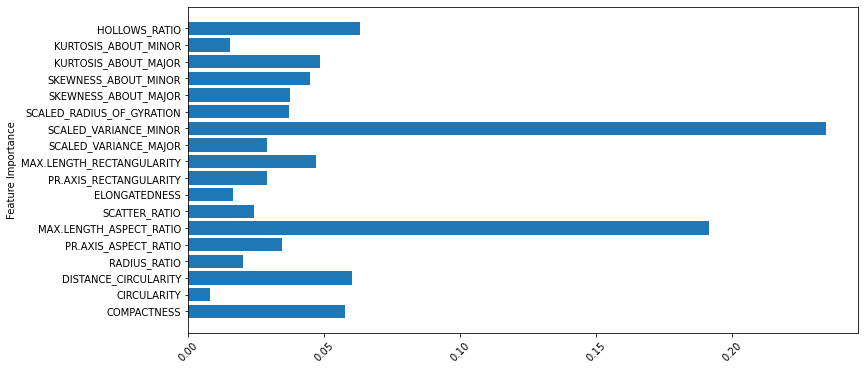

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("vehicle_csv.csv")
print(data.isnull().sum())
print(data.describe())

# Feature Selection/Engineering
selected_features = ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO',
                     'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY',
                     'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
                     'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR',
                     'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO']

X = data[selected_features]
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model Interpretation
feature_importance = model.feature_importances_

# Visualization
plt.figure(figsize=(12,6))
plt.barh(selected_features, feature_importance)
plt.xticks(rotation=45)
plt.ylabel('Feature Importance')
plt.show()
